# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

In [ ]:
pretty weak correlation with apparently many outliers and a low R² value.


**(b) Describe the relationship between volume and diameter of these trees.**

In [ ]:
pretty strong correlation with apparently few outliers and a high R² value.

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

In [ ]:
diameter, because it shows a strong correlation with the target variable volume.

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [24]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data with pandas 
utils = pd.read_csv("data/utils.csv")
utils.head(n=12)

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


In [25]:
# Rename columns for easier access
utils = utils.rename(columns={'Average Bill': "avg_bill", 'Average Monthly Temperature': "avg_temp"})
utils.head(n=12)

,Month,avg_bill,avg_temp
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

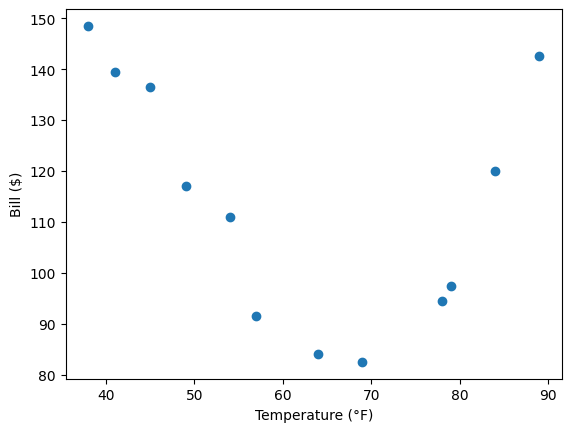

In [5]:
# Plot the variables of interest as scatter plot
plt.scatter(utils['avg_temp'], utils['avg_bill'])
plt.xlabel("Temperature (°F)");
plt.ylabel("Bill ($)");

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

In [ ]:
u shaped due to heating and cooling requirements at low and high temperatures

**(d) Train a simple linear regression model using scikit-learn**

In [11]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

# Create masks
cold_mask = utils['avg_temp'] <= 70
hot_mask = utils['avg_temp'] > 70

# Prepare data for modeling by defining target and feature
x_cold = utils[['avg_temp']][cold_mask]  # IF temperature is below 70°F
x_hot = utils[['avg_temp']][hot_mask]    # IF temperature is above 70°F
y_cold = utils['avg_bill'][cold_mask]
y_hot = utils['avg_bill'][hot_mask]

# Show dimensions of X
x_cold.head(n=12)

,avg_temp
0,38
1,45
2,49
3,57
4,69
9,64
10,54
11,41


In [27]:
# Instantiate our model 
lin_reg_cold = LinearRegression()

# Train the model using our data
lin_reg_cold.fit(x_cold, y_cold)

# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg_cold.intercept_
slope = lin_reg_cold.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature temperature:", slope)

Model intercept: 234.8834204630321
Coefficient for feature temperature: -2.322703510082151


In [30]:
# Instantiate our model 
lin_reg_hot = LinearRegression()

# Train the model using our data
lin_reg_hot.fit(x_hot, y_hot)

# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg_hot.intercept_
slope = lin_reg_hot.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature temperature:", slope)

Model intercept: -250.3928571428571
Coefficient for feature temperature: 4.412337662337662


In [21]:
x_cold.shape

(8, 1)

In [20]:
y_cold.shape

(8,)

**(e) Calculate and interpret the value of $R^2$.**  

In [28]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

# Calculate the estimated value for each data point
y_hat = lin_reg_cold.predict(X)

# Calculate the R-squared for our model
print("R-squared:", round(r2_score(y, y_hat), 3))

R-squared: -2.759


In [31]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

# Calculate the estimated value for each data point
y_hat = lin_reg_hot.predict(X)

# Calculate the R-squared for our model
print("R-squared:", round(r2_score(y, y_hat), 3))

R-squared: -28.109


**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

Text(0, 0.5, 'Avg Bill')

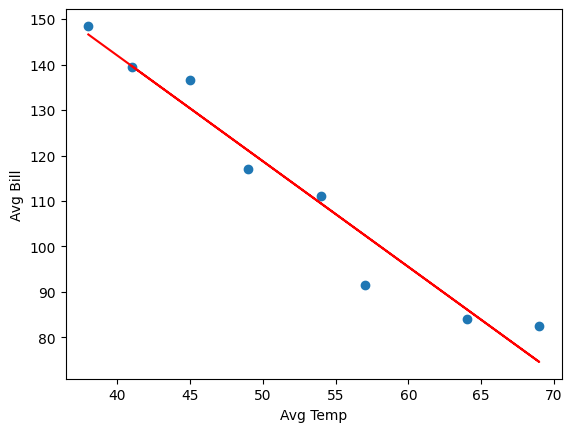

In [29]:
import matplotlib.pyplot as plt

plt.scatter(x_cold, y_cold)
plt.plot(x_cold, lin_reg_cold.predict(x_cold), color='red')
plt.xlabel("Avg Temp")
plt.ylabel("Avg Bill")

Text(0, 0.5, 'Avg Bill')

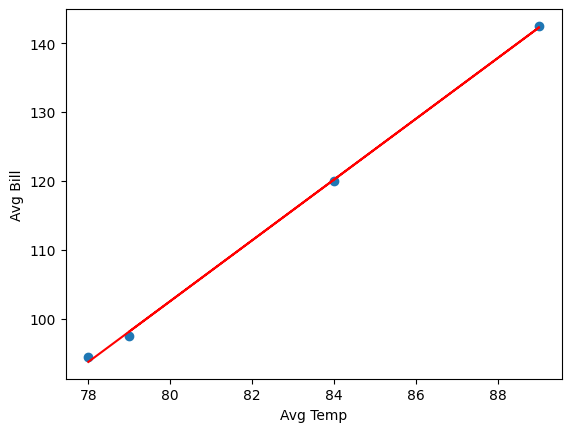

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x_hot, y_hot)
plt.plot(x_hot, lin_reg_hot.predict(x_hot), color='red')
plt.xlabel("Avg Temp")
plt.ylabel("Avg Bill")

In [18]:
len(X_cold)
y_cold.var()

np.float64(680.4241071428571)

In [33]:
len(X_cold)
y_hot.var()

np.float64(500.0625)

**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [36]:
# Make a prediction of bill amount for 120° F
lin_reg_hot_120 = pd.DataFrame({'avg_temp': [120]})
y_hat_new = lin_reg_hot.predict(lin_reg_hot_120)

print("Predicted value for new observation:", y_hat_new[0].round(3))

Predicted value for new observation: 279.088
